In [1]:
!pip install plotly

In [2]:
!pip install plotly --upgrade

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import plotly.io as pio
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as po
import plotly.graph_objs as pg
import matplotlib.pyplot as plt
#pio.renderers.default='notebook'

In [4]:
df=pd.read_csv('Mall_Customers.csv')

In [5]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [6]:
df.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [7]:
df.columns=['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score']

In [8]:
df['Total_sales'] = df["Annual Income"] + df["Spending Score"]

C:\Users\Fahad\AppData\Local\Temp\ipykernel_3048\1162849116.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




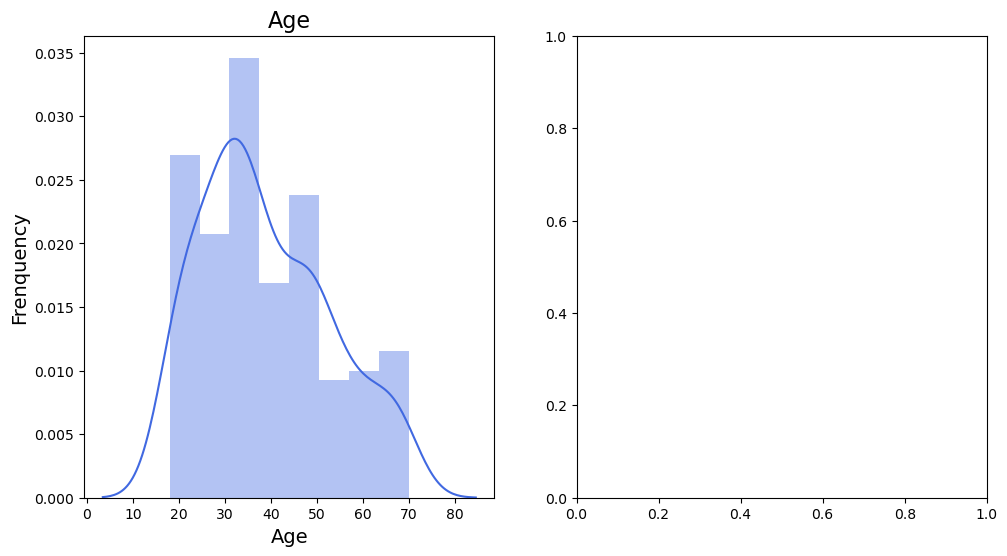

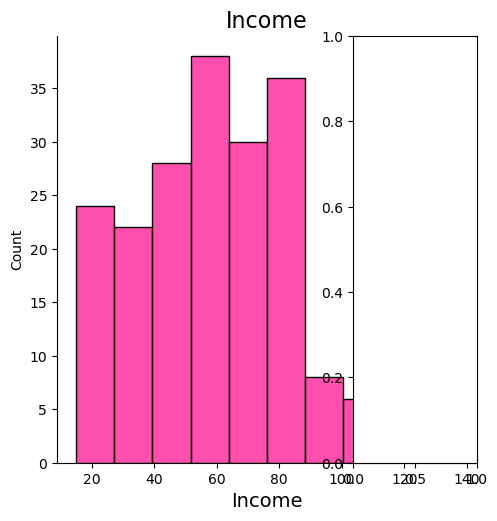

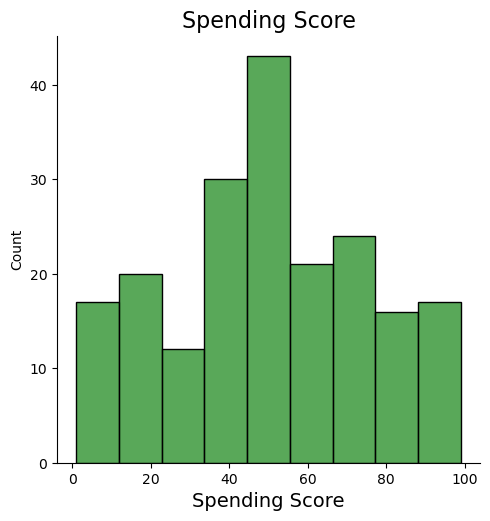

In [9]:
plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
sns.distplot(df['Age'], color='royalblue')
plt.title('Age', fontsize = 16)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Frenquency', fontsize=14)

plt.subplot(1, 3, 2)
sns.displot(df['Annual Income'], color = 'deeppink')
plt.title('Income', fontsize = 16)
plt.xlabel('Income', fontsize = 14)

plt.subplot(1, 3, 3)
sns.displot(df['Spending Score'], color = 'forestgreen')
plt.title('Spending Score', fontsize = 16)
plt.xlabel('Spending Score', fontsize = 14)

plt.show()

C:\Users\Fahad\AppData\Local\Temp\ipykernel_3048\75445486.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Fahad\AppData\Local\Temp\ipykernel_3048\75445486.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Fahad\AppData\Local\Temp\ipykernel_3048\75445486.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




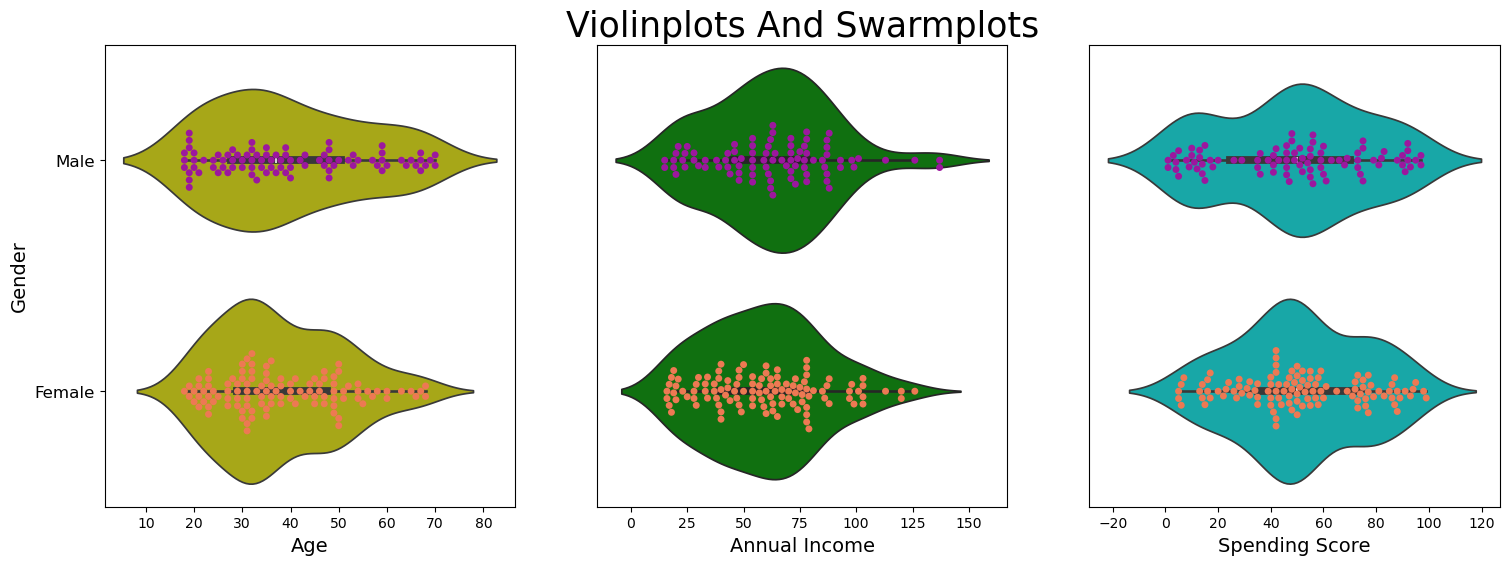

In [10]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.violinplot(x = 'Age', y = 'Gender', data = df, color = 'y')
sns.swarmplot(x = 'Age', y = 'Gender', data = df, palette = 'plasma')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.yticks([0,1],['Male', 'Female'], fontsize=12)

plt.subplot(1, 3, 2)
sns.violinplot(x = 'Annual Income', y ='Gender', data=df, color='g')
sns.swarmplot(x = 'Annual Income', y='Gender', data=df, palette='plasma')
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel(' ')
plt.yticks([])
plt.title('Violinplots And Swarmplots', fontsize= 25)

plt.subplot(1, 3, 3)
sns.violinplot(x ='Spending Score', y='Gender', data=df, color='c')
sns.swarmplot(x ='Spending Score', y='Gender', data=df, palette='plasma')
plt.xlabel('Spending Score', fontsize=14)
plt.ylabel(' ')
plt.yticks([])

plt.show()

C:\Users\Fahad\AppData\Local\Temp\ipykernel_3048\376533667.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




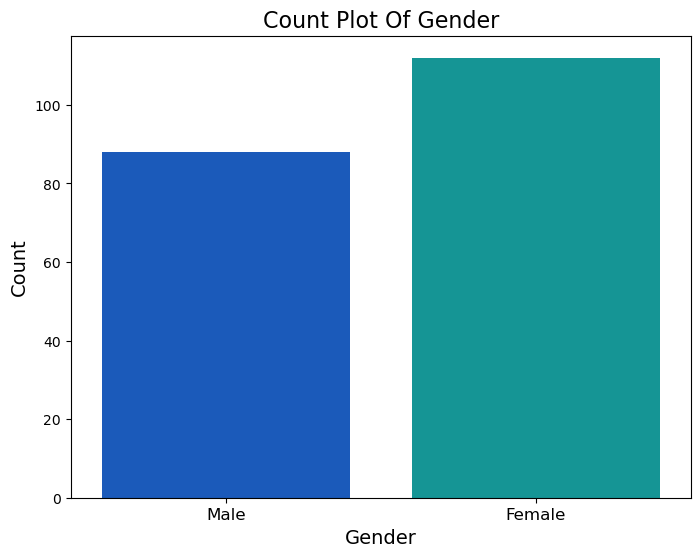

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='winter')
plt.title('Count Plot Of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0,1],['Male','Female'], fontsize=12)
plt.show()

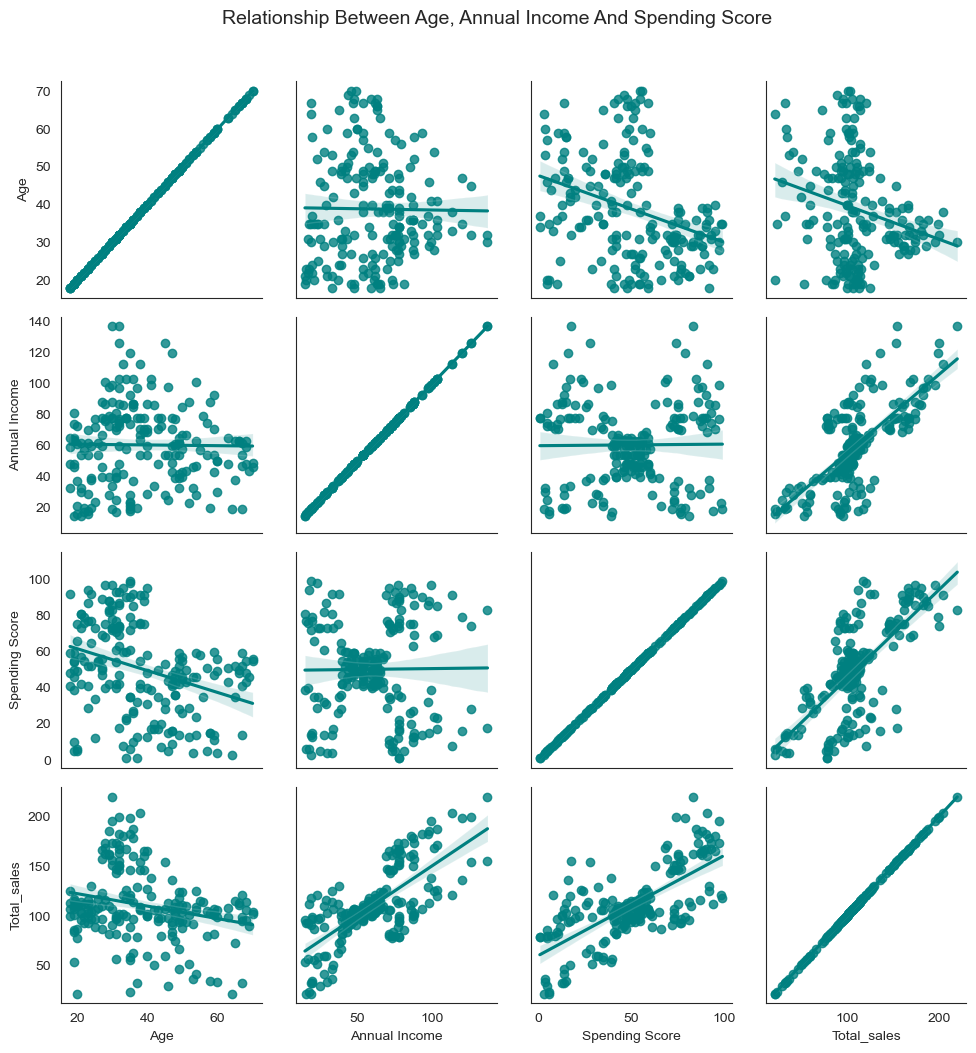

In [12]:
sns.set_style('white')
new=sns.PairGrid(df.drop(['CustomerID', 'Gender'],axis=1))
new.map(sns.regplot, color='teal')
plt.suptitle('Relationship Between Age, Annual Income And Spending Score', y=1.05,fontsize=14)
plt.show()

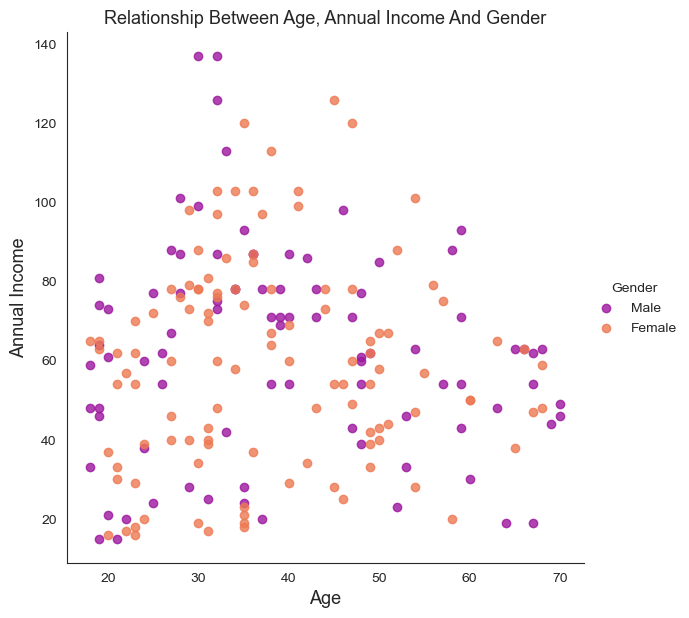

In [13]:
sns.lmplot(x='Age', y='Annual Income', data=df, fit_reg=False, hue='Gender', height=6, palette='plasma')
plt.title('Relationship Between Age, Annual Income And Gender', fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Annual Income', fontsize=13)
plt.show()

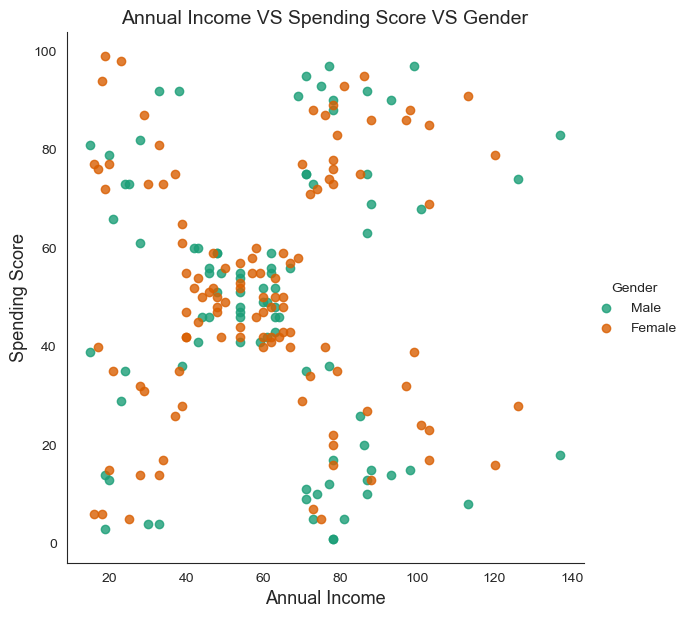

In [14]:
sns.lmplot(x='Annual Income', y='Spending Score', data = df, fit_reg=False, hue='Gender',height=6, palette='Dark2')
plt.title('Annual Income VS Spending Score VS Gender', fontsize=14)
plt.xlabel('Annual Income', fontsize=13)
plt.ylabel('Spending Score', fontsize=13)
plt.show()

X1=df[['Aged','Spending Score']]
inertia1=[]
for n in range(1, 11):
    model1=KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='lloyd')
    model1.fit(X1)
    inertial.append(mode1.inertia_)
print(inertia1)

In [16]:
X1=df[['Age','Spending Score']]
inertia1=[]
for n in range(1, 11):
    model1=KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='lloyd')
    model1.fit(X1)
    inertia1.append(model1.inertia_)
print(inertia1)

C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

[171535.5, 75949.15601023019, 45840.67661610867, 28165.58356662934, 23818.84825158133, 19510.328802776174, 15514.193134351035, 13012.800984809695, 11513.134979462546, 10590.814352780133]


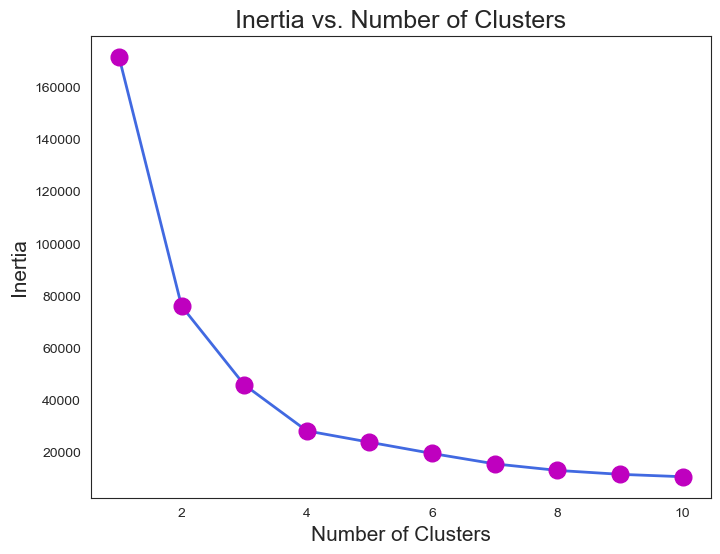

In [17]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1 , 11)), inertia1, color='royalblue', marker='o',linewidth=2, markersize=12, 
         markerfacecolor='m', markeredgecolor='m')
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.show()

In [18]:
model1=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='lloyd')
model1.fit(X1)
labels1=model1.labels_
centroids1=model1.cluster_centers_

C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



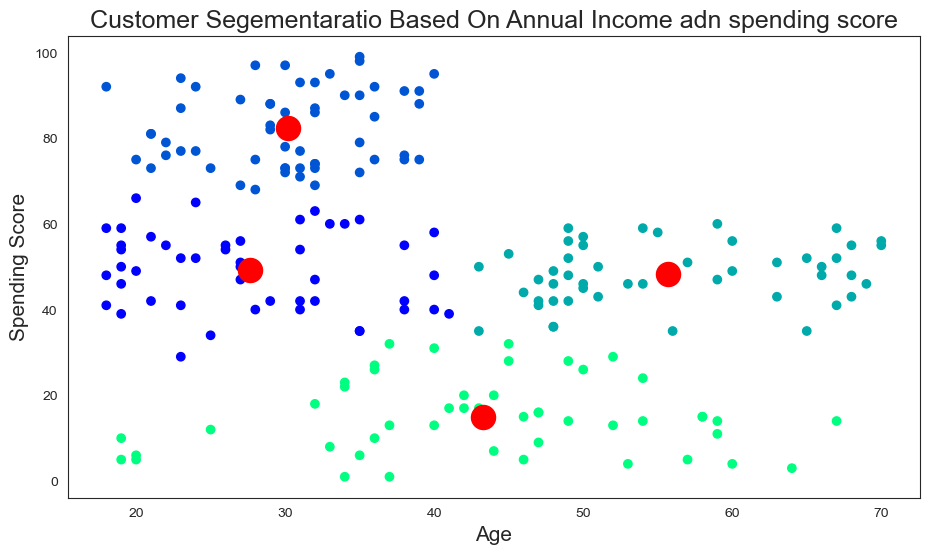

In [19]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=df['Age'], y=df['Spending Score'], c=labels1, cmap='winter')
plt.scatter(x=centroids1[:,0], y= centroids1[:,1], s=300, c='red')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Spending Score', fontsize=15)
plt.title('Customer Segementaratio Based On Annual Income adn spending score', fontsize=18)
plt.show()

In [20]:
X2=df[['Annual Income','Spending Score']]
inertia2=[]
for n in range(1,11):
    model2=KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.001, random_state=111, algorithm='lloyd')
    model2.fit(X2)
    inertia2.append(model2.inertia_)
print(inertia2)

C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37265.86520484346, 30241.343617936585, 25022.485004530354, 21841.97825674864, 19726.10834814462]


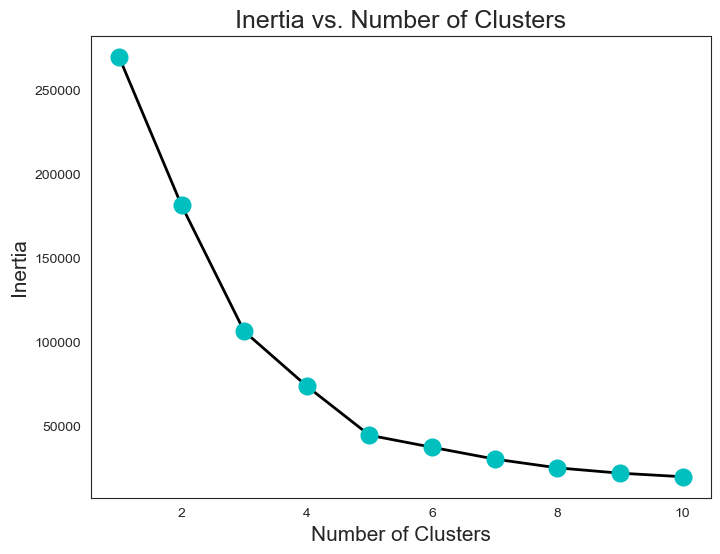

In [21]:
plt.figure(figsize=(8,6))
sns.set_style('white')
plt.plot(list(range(1,11)),inertia2,color='black', marker='o',linewidth=2, markersize=12, markerfacecolor='c', markeredgecolor='c')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.show()

In [22]:
model2=KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='lloyd')
model2.fit(X2)
centroids2=model2.cluster_centers_
labels2=model2.labels_

C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



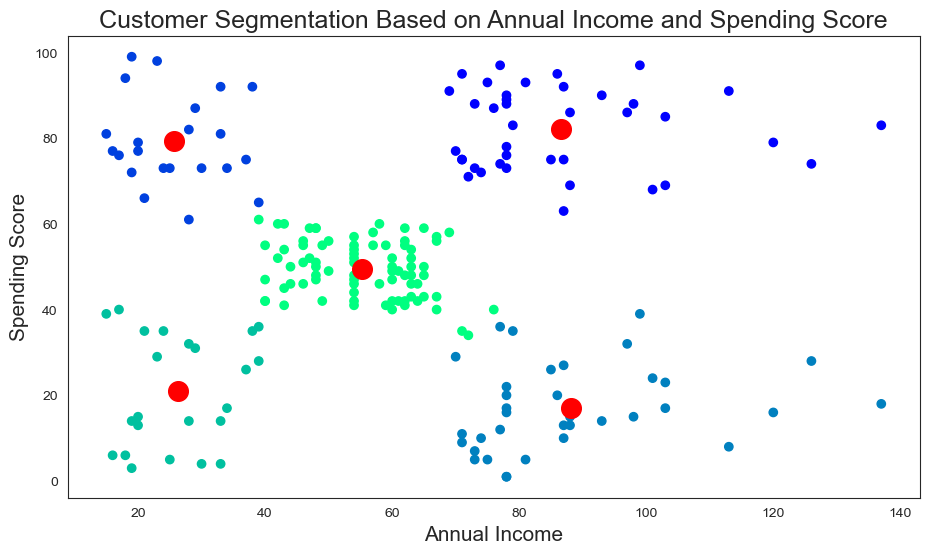

In [23]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=df['Annual Income'], y=df['Spending Score'],c=labels2,cmap='winter')
plt.scatter(centroids2[:,0], centroids2[:,1],c='red',s=200)
plt.xlabel('Annual Income',fontsize=15)
plt.ylabel('Spending Score',fontsize=15)
plt.title('Customer Segmentation Based on Annual Income and Spending Score',fontsize=18)
plt.show()

In [24]:
X3=df[['Age', 'Annual Income', 'Spending Score']]
inertia3=[]
for n in range (1,10):
    model3=KMeans(n_clusters=n,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model3.fit(X3)
    inertia3.append(model3.inertia_)
print(inertia3)


C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1435: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.

C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



[308812.78, 212840.1698209719, 143342.751571706, 104366.15145556198, 75479.76429338778, 58300.44332159069, 51525.773770373766, 44307.87341670445, 40932.6282276547]


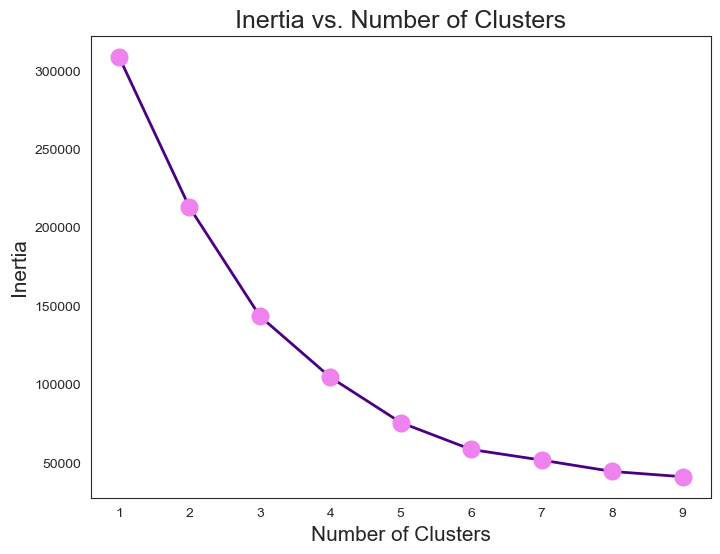

In [25]:
plt.figure(figsize=(8,6))
plt.plot(list(range (1,10)),inertia3, color='indigo',marker='o', linewidth=2, markersize=12,
         markerfacecolor='violet', markeredgecolor='violet')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.show()

In [26]:
model3=KMeans(n_clusters=6,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model3.fit(X3)
centroids3=model3.cluster_centers_
labels3=model3.labels_


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import plotly.io as pio
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as po
import plotly.graph_objs as pg
import matplotlib.pyplot as plt

pio.renderers.default='notebook'

In [28]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML(''''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [29]:
configure_plotly_browser_state()

In [30]:
!pip install plotly --upgrade

In [31]:
po.init_notebook_mode(connected = True)

In [32]:
fig=px.scatter_3d(data_frame=df,x='Age',y='Annual Income',z='Spending Score',color=labels3, color_continuous_scale='bluered')
fig.update_layout(
    title={
        'text': 'Customer Segmentation Based on Age, Annual Income and Spending Score',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="colab")

In [33]:
#df=pd.read_csv('Mall_Customers.csv')

In [34]:
#df.columns=['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score']

In [35]:
#df['Total_sales'] = df["Annual Income"] + df["Spending Score"]

In [36]:
#df.head(2)

In [37]:
import plotly.express as px

fig = px.histogram(df, x='Annual Income', y='Age',  
                   title='Distribution of Annual Income',  
                   labels={'Annual Income': 'Annual Income'},  
                   nbins=20)

# Customize x-axis and y-axis colors
fig.update_layout(
    xaxis=dict(showline=True, linecolor='blue', linewidth=3),
    yaxis=dict(showline=True, linecolor='red', linewidth=3)
)

fig.show()


Text(0, 0.5, 'Frequency')

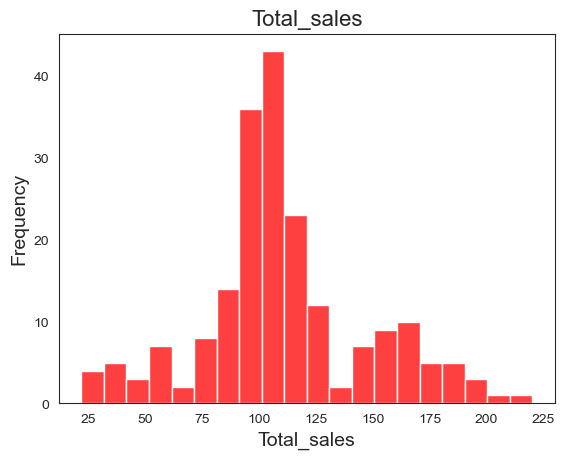

In [38]:
sns.histplot(df['Total_sales'], color='red')
plt.title('Total_sales', fontsize = 16)
plt.xlabel('Total_sales', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

In [39]:
# Histogram: Distribution of Spending Score
fig = px.histogram(df, x='Spending Score',color ='Age',
                    title='Distribution of Spending Score',
                    labels={'Spending Score': 'Spending Score'},
                    nbins=20)

fig.show()

Text(0, 0.5, 'Frequency')

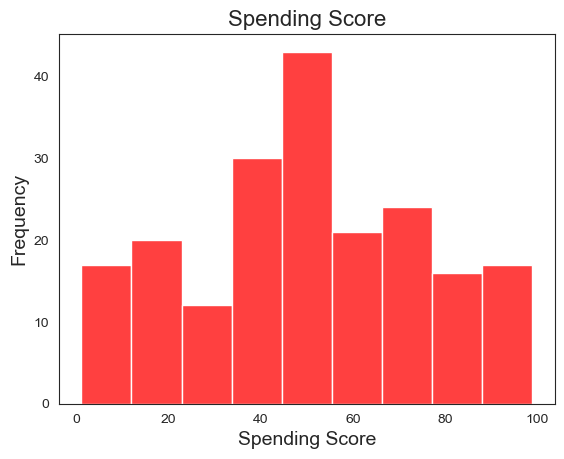

In [40]:
sns.histplot(df['Spending Score'], color='red')
plt.title('Spending Score', fontsize = 16)
plt.xlabel('Spending Score', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

In [41]:
# Histogram: Distribution of Annual Income
fig = px.histogram(df, x='Annual Income', color ='Gender',
                    title='Distribution of Annual Income',
                    labels={'Annual Income': 'Annual Income'},
                    nbins=20)

fig.show()

In [42]:
# Histogram: Distribution of Annual Income
fig = px.histogram(df, x='Annual Income',
                    title='Distribution of Annual Income',
                    labels={'Annual Income': 'Annual Income'},
                    nbins=20)

fig.show()

Text(0, 0.5, 'Frequency')

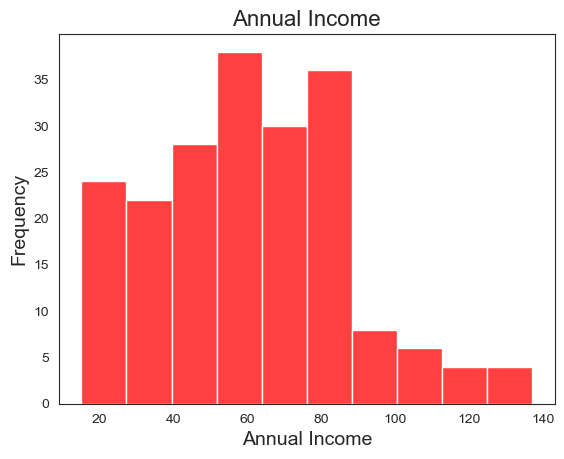

In [43]:
sns.histplot(df['Annual Income'], color='red')
plt.title('Annual Income', fontsize = 16)
plt.xlabel('Annual Income', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

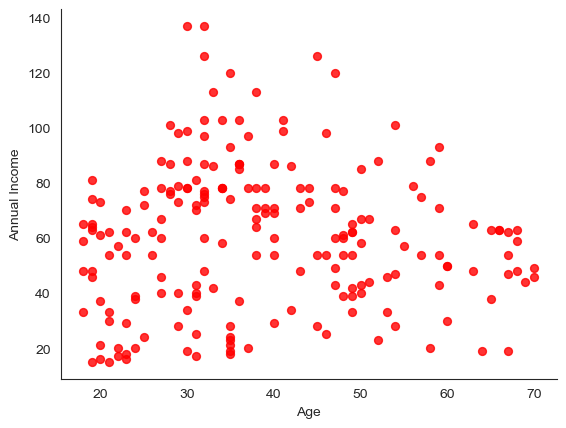

In [44]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Annual Income',color='red', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [45]:
# Pie chart: Distribution of Product Sales
product_sales = df.groupby('Gender')['Annual Income'].sum().reset_index()

fig = px.pie(product_sales, values='Annual Income', names='Gender',
              title='Distribution of Annual Income')

fig.show()

In [46]:
# Pie chart: Distribution of Product Sales
product_sales = df.groupby('Gender')['Total_sales'].sum().reset_index()

fig = px.pie(product_sales, values='Total_sales', names='Gender',
              title='Distribution of Product Sales')

fig.show()

In [47]:
def bgc(s):
    age = s["Age"]
    
    if age < 10:
        return ["background-color: tan; color: black"] * len(s)
    elif age > 50:
        return ["background-color: silver; color: black"] * len(s)
    elif age > 40:
        return ["background-color: lightpink; color: darkblue"] * len(s)
    elif age > 30:
        return ["background-color: darkblue; color: white"] * len(s)
    elif age > 20:
        return ["background-color: gold; color: black"] * len(s)
    else:
        return ["background-color: darkred; color: white"] * len(s)

df_styled = df.style.apply(bgc, axis=1)
df_styled


,CustomerID,Gender,Age,Annual Income,Spending Score,Total_sales
0,1,Male,19,15,39,54
1,2,Male,21,15,81,96
2,3,Female,20,16,6,22
3,4,Female,23,16,77,93
4,5,Female,31,17,40,57
5,6,Female,22,17,76,93
6,7,Female,35,18,6,24
7,8,Female,23,18,94,112
8,9,Male,64,19,3,22
9,10,Female,30,19,72,91


In [48]:
#df.head(2)

In [49]:
# Histogram: Distribution of Annual Income
fig = px.histogram(df, x='Age',
                    title='Distribution of Age',
                    labels={'Age': 'Age'},
                    nbins=20)

fig.show()

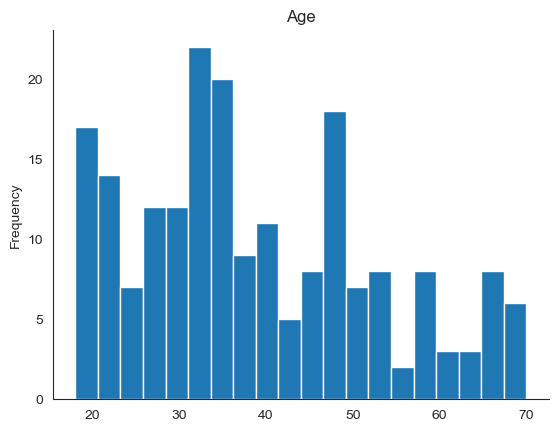

In [50]:
from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [51]:
# Violin plot: Spending Score by Age Group
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                          labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

fig = px.violin(df, x='Age_Group', y='Spending Score', box=True, points="all",
                  title='Spending Score by Age Group',
                  labels={'Age_Group': 'Age Group', 'Spending Score': 'Spending Score'})

fig.show()

In [52]:
import pandas as pd
import plotly.express as px

# Create Age Group Bins
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                          labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Create a violin plot for Age, Annual Income, and Spending Score
fig = px.violin(df.melt(id_vars=['Age_Group'], value_vars=['Age', 'Annual Income', 'Spending Score']),
                x='Age_Group', y='value', color='variable', box=True, points="all",
                title='Distribution of Age, Annual Income, and Spending Score by Age Group',
                labels={'Age_Group': 'Age Group', 'value': 'Value', 'variable': 'Feature'})

# Show plot
fig.show()


In [53]:
# Violin plot for Spending Score BY Age Group
fig3 = px.violin(df, x='Age_Group', y='Age', box=True, points="all",
                 color='Age_Group',
                 title='Spending Score Distribution by Age Group',
                 labels={'Age_Group': 'Age Group', 'Spending Score': 'Spending Score'},
                 color_discrete_sequence=px.colors.qualitative.Set1)
fig3.show()


In [54]:
import plotly.express as px

# Violin plot for Annual Income with colors
fig2 = px.violin(df, x='Age_Group', y='Annual Income', box=True, points="all",
                 color='Age_Group',  # Color based on Age Group
                 title='Annual Income Distribution by Age Group',
                 labels={'Age_Group': 'Age Group', 'Annual Income': 'Annual Income'},
                 color_discrete_sequence=px.colors.qualitative.Set2)  # Choose a color palette

fig2.show()


In [55]:
import plotly.express as px

# Violin plot for Annual Income with colors
fig2 = px.violin(df, x='Age_Group', y='Spending Score', box=True, points="all",
                 color='Age_Group',  
                 title='Annual Income Distribution by Age Group',
                 labels={'Age_Group': 'Age Group', 'Annual Income': 'Annual Income'},
                 color_discrete_sequence=px.colors.qualitative.Set3)  # Choose a color palette

fig2.show()


In [56]:
# Create Age Group Bins
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                          labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Violin plot for Age
fig1 = px.violin(df, x='Age_Group', y='Age', box=True, points="all",
                 title='Age Distribution by Age Group',
                 labels={'Age_Group': 'Age Group', 'Age': 'Age'})
fig1.show()

# Violin plot for Annual Income
fig2 = px.violin(df, x='Age_Group', y='Annual Income', box=True, points="all",
                 title='Annual Income Distribution by Age Group',
                 labels={'Age_Group': 'Age Group', 'Annual Income': 'Annual Income'})
fig2.show()

# Violin plot for Spending Score
fig3 = px.violin(df, x='Age_Group', y='Spending Score', box=True, points="all",
                 title='Spending Score Distribution by Age Group',
                 labels={'Age_Group': 'Age Group', 'Spending Score': 'Spending Score'})
fig3.show()


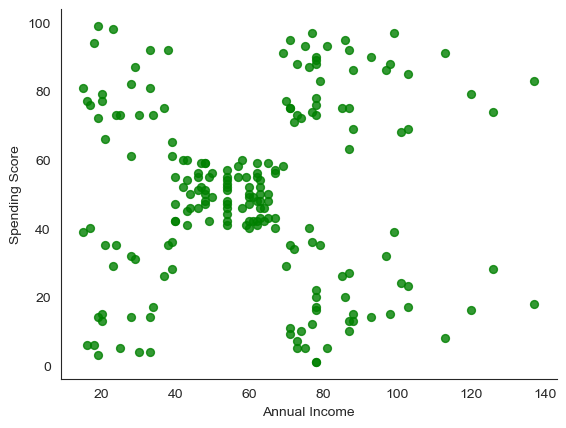

In [57]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Annual Income', y='Spending Score',color='green', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [58]:
import plotly.express as px

# Scatter plot: Age vs. Spending Score
fig1 = px.scatter(df, x='Age', y='Spending Score',color='Age',
                  title='Age vs. Spending Score',
                  labels={'Age': 'Age', 'Spending Score': 'Spending Score'},
                  hover_data=['Annual Income'])

fig1.show()

In [59]:
import plotly.express as px

# Scatter plot: Age vs. Spending Score with color
fig1 = px.scatter(df, x='Age', y='Spending Score',
                  color='Annual Income',  
                  title='Age vs. Spending Score',
                  labels={'Age': 'Age', 'Spending Score': 'Spending Score'},
                  hover_data=['Annual Income'],
                  color_continuous_scale='viridis')  

fig1.show()


In [60]:
# Bar plot: Total Sales by Gender
total_sales_by_gender = df.groupby('Gender')['Total_sales'].sum().reset_index()

fig2 = px.bar(total_sales_by_gender, x='Gender', y='Total_sales', color= 'Gender',
              title='Total Sales by Gender',
              labels={'Genre': 'Gender', 'Total_sales': 'Total Sales'})
fig2.show()

In [61]:
import plotly.express as px
fig = px.scatter(df, x="Age", y="Total_sales", color="Gender", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [62]:
fig = px.bar(df, x="Age", y="Spending Score", color="Gender", barmode="group")
fig.show()

In [63]:
fig = px.bar(df, x="Gender", y="Age", color="Gender",
             pattern_shape="Gender", pattern_shape_sequence=[".", "x", "+"])
fig.show()

In [64]:
fig = px.parallel_categories(df, color="Spending Score", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [65]:
df.head(2)

,CustomerID,Gender,Age,Annual Income,Spending Score,Total_sales,Age_Group
0,1,Male,19,15,39,54,0-20
1,2,Male,21,15,81,96,21-30


In [66]:

df1=pd.read_csv('Mall_Add_Country.csv')


In [67]:
df1.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Country
0,1,Male,19,15,39,India
1,2,Male,21,15,81,India


In [68]:
fig = px.histogram(df, x="Annual Income", y="Spending Score", color="Gender", marginal="rug", hover_data=df.columns)
fig.show()

In [69]:
fig = px.box(df, x="CustomerID", y="Total_sales", color="Gender", notched=True)
fig.show()

In [70]:
fig = px.density_contour(df, x="CustomerID", y="Total_sales")
fig.show()

In [71]:
fig = px.density_heatmap(df, x="Gender", y="Total_sales", marginal_x="rug", marginal_y="histogram")
fig.show()

In [72]:
fig = px.bar_polar(df, r="Spending Score", theta="Total_sales", color="Age", template="plotly_dark",
            color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [73]:
''''
#!pip install anywidget
''''

SyntaxError: unterminated string literal (detected at line 3) (2415366877.py, line 3)

In [ ]:
''''
#from plotly.graph_objects import FigureWidget
''''

In [ ]:
''''
!pip install FigureWidget
''''

In [ ]:
''''
import plotly.express as px
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
''''

In [ ]:
''''
import plotly.graph_objects as go

df = go.FigureWidget()
df
''''

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#conda install -c conda-forge pandas-profiling
#conda install -c "conda-forge/label/cf201901" pandas-profiling
#conda install -c "conda-forge/label/cf202003" pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
import ydata_profiling
df=X3[['Age', 'Annual Income', 'Spending Score']].copy()
profile=ProfileReport(df,title='Customer_Analysis')
profile.to_file('Customer_Analysis.html')